## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9948728	total: 48.6ms	remaining: 48.5s
1:	learn: 0.9742225	total: 49.6ms	remaining: 24.8s
2:	learn: 0.9531878	total: 50.6ms	remaining: 16.8s
3:	learn: 0.9362895	total: 51.6ms	remaining: 12.8s
4:	learn: 0.9190194	total: 52.6ms	remaining: 10.5s
5:	learn: 0.9003581	total: 53.6ms	remaining: 8.87s
6:	learn: 0.8815288	total: 54.5ms	remaining: 7.74s
7:	learn: 0.8644718	total: 55.5ms	remaining: 6.88s
8:	learn: 0.8475730	total: 56.6ms	remaining: 6.23s
9:	learn: 0.8299984	total: 57.6ms	remaining: 5.7s
10:	learn: 0.8148219	total: 58.5ms	remaining: 5.26s
11:	learn: 0.7992064	total: 59.4ms	remaining: 4.89s
12:	learn: 0.7824393	total: 60.5ms	remaining: 4.59s
13:	learn: 0.7666940	total: 61.6ms	remaining: 4.34s
14:	learn: 0.7534662	total: 62.6ms	remaining: 4.11s
15:	learn: 0.7408029	total: 63.7ms	remaining: 3.92s
16:	learn: 0.7273961	total: 64.8ms	remaining: 3.75s
17:	learn: 0.7156564	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7027071	total: 66.8ms	remaining: 

90:	learn: 0.3234938	total: 143ms	remaining: 1.43s
91:	learn: 0.3212331	total: 145ms	remaining: 1.43s
92:	learn: 0.3197515	total: 146ms	remaining: 1.42s
93:	learn: 0.3178398	total: 147ms	remaining: 1.41s
94:	learn: 0.3164285	total: 148ms	remaining: 1.41s
95:	learn: 0.3148823	total: 149ms	remaining: 1.4s
96:	learn: 0.3131482	total: 150ms	remaining: 1.4s
97:	learn: 0.3114142	total: 151ms	remaining: 1.39s
98:	learn: 0.3095699	total: 152ms	remaining: 1.38s
99:	learn: 0.3085774	total: 153ms	remaining: 1.38s
100:	learn: 0.3073913	total: 154ms	remaining: 1.37s
101:	learn: 0.3062019	total: 155ms	remaining: 1.36s
102:	learn: 0.3051330	total: 156ms	remaining: 1.36s
103:	learn: 0.3034565	total: 157ms	remaining: 1.35s
104:	learn: 0.3017459	total: 158ms	remaining: 1.35s
105:	learn: 0.3000694	total: 159ms	remaining: 1.34s
106:	learn: 0.2984635	total: 160ms	remaining: 1.34s
107:	learn: 0.2975818	total: 162ms	remaining: 1.33s
108:	learn: 0.2964171	total: 163ms	remaining: 1.33s
109:	learn: 0.2953456	to

221:	learn: 0.2114209	total: 280ms	remaining: 980ms
222:	learn: 0.2107980	total: 281ms	remaining: 978ms
223:	learn: 0.2102230	total: 282ms	remaining: 976ms
224:	learn: 0.2099498	total: 283ms	remaining: 975ms
225:	learn: 0.2095913	total: 284ms	remaining: 973ms
226:	learn: 0.2088157	total: 285ms	remaining: 971ms
227:	learn: 0.2082872	total: 286ms	remaining: 969ms
228:	learn: 0.2076599	total: 287ms	remaining: 967ms
229:	learn: 0.2070052	total: 288ms	remaining: 965ms
230:	learn: 0.2064607	total: 289ms	remaining: 963ms
231:	learn: 0.2060895	total: 290ms	remaining: 961ms
232:	learn: 0.2055208	total: 291ms	remaining: 959ms
233:	learn: 0.2050216	total: 292ms	remaining: 957ms
234:	learn: 0.2042052	total: 293ms	remaining: 955ms
235:	learn: 0.2035652	total: 294ms	remaining: 953ms
236:	learn: 0.2030939	total: 295ms	remaining: 951ms
237:	learn: 0.2027053	total: 296ms	remaining: 949ms
238:	learn: 0.2020620	total: 297ms	remaining: 947ms
239:	learn: 0.2012853	total: 299ms	remaining: 945ms
240:	learn: 

345:	learn: 0.1574210	total: 413ms	remaining: 781ms
346:	learn: 0.1569704	total: 414ms	remaining: 780ms
347:	learn: 0.1566534	total: 416ms	remaining: 778ms
348:	learn: 0.1563005	total: 417ms	remaining: 777ms
349:	learn: 0.1558882	total: 418ms	remaining: 776ms
350:	learn: 0.1554796	total: 419ms	remaining: 774ms
351:	learn: 0.1551357	total: 420ms	remaining: 773ms
352:	learn: 0.1546806	total: 421ms	remaining: 772ms
353:	learn: 0.1542595	total: 422ms	remaining: 771ms
354:	learn: 0.1537552	total: 423ms	remaining: 769ms
355:	learn: 0.1534372	total: 424ms	remaining: 768ms
356:	learn: 0.1530183	total: 425ms	remaining: 766ms
357:	learn: 0.1526354	total: 426ms	remaining: 765ms
358:	learn: 0.1525427	total: 427ms	remaining: 763ms
359:	learn: 0.1522944	total: 428ms	remaining: 762ms
360:	learn: 0.1518476	total: 430ms	remaining: 760ms
361:	learn: 0.1515188	total: 431ms	remaining: 759ms
362:	learn: 0.1513207	total: 432ms	remaining: 757ms
363:	learn: 0.1508680	total: 433ms	remaining: 756ms
364:	learn: 

476:	learn: 0.1211233	total: 548ms	remaining: 601ms
477:	learn: 0.1208924	total: 549ms	remaining: 600ms
478:	learn: 0.1206365	total: 550ms	remaining: 598ms
479:	learn: 0.1204873	total: 551ms	remaining: 597ms
480:	learn: 0.1202388	total: 552ms	remaining: 596ms
481:	learn: 0.1201206	total: 553ms	remaining: 595ms
482:	learn: 0.1198550	total: 554ms	remaining: 593ms
483:	learn: 0.1195365	total: 555ms	remaining: 592ms
484:	learn: 0.1193815	total: 556ms	remaining: 591ms
485:	learn: 0.1192470	total: 557ms	remaining: 589ms
486:	learn: 0.1191051	total: 558ms	remaining: 588ms
487:	learn: 0.1187785	total: 559ms	remaining: 587ms
488:	learn: 0.1186588	total: 560ms	remaining: 586ms
489:	learn: 0.1184048	total: 561ms	remaining: 584ms
490:	learn: 0.1181767	total: 562ms	remaining: 583ms
491:	learn: 0.1178805	total: 563ms	remaining: 582ms
492:	learn: 0.1177565	total: 564ms	remaining: 580ms
493:	learn: 0.1176021	total: 565ms	remaining: 579ms
494:	learn: 0.1173456	total: 566ms	remaining: 578ms
495:	learn: 

603:	learn: 0.0969010	total: 680ms	remaining: 446ms
604:	learn: 0.0967233	total: 681ms	remaining: 445ms
605:	learn: 0.0965197	total: 682ms	remaining: 443ms
606:	learn: 0.0964399	total: 683ms	remaining: 442ms
607:	learn: 0.0962511	total: 684ms	remaining: 441ms
608:	learn: 0.0960612	total: 685ms	remaining: 440ms
609:	learn: 0.0958686	total: 686ms	remaining: 439ms
610:	learn: 0.0957160	total: 688ms	remaining: 438ms
611:	learn: 0.0956430	total: 688ms	remaining: 436ms
612:	learn: 0.0954531	total: 689ms	remaining: 435ms
613:	learn: 0.0952605	total: 691ms	remaining: 434ms
614:	learn: 0.0951557	total: 692ms	remaining: 433ms
615:	learn: 0.0949598	total: 692ms	remaining: 432ms
616:	learn: 0.0949138	total: 694ms	remaining: 431ms
617:	learn: 0.0947151	total: 695ms	remaining: 430ms
618:	learn: 0.0945020	total: 697ms	remaining: 429ms
619:	learn: 0.0943657	total: 698ms	remaining: 428ms
620:	learn: 0.0941308	total: 700ms	remaining: 427ms
621:	learn: 0.0939194	total: 701ms	remaining: 426ms
622:	learn: 

725:	learn: 0.0791069	total: 814ms	remaining: 307ms
726:	learn: 0.0789304	total: 815ms	remaining: 306ms
727:	learn: 0.0787569	total: 816ms	remaining: 305ms
728:	learn: 0.0786517	total: 817ms	remaining: 304ms
729:	learn: 0.0785713	total: 818ms	remaining: 303ms
730:	learn: 0.0784583	total: 819ms	remaining: 301ms
731:	learn: 0.0782596	total: 820ms	remaining: 300ms
732:	learn: 0.0781931	total: 821ms	remaining: 299ms
733:	learn: 0.0780611	total: 822ms	remaining: 298ms
734:	learn: 0.0779491	total: 824ms	remaining: 297ms
735:	learn: 0.0778976	total: 825ms	remaining: 296ms
736:	learn: 0.0777610	total: 826ms	remaining: 295ms
737:	learn: 0.0776566	total: 827ms	remaining: 294ms
738:	learn: 0.0775046	total: 828ms	remaining: 292ms
739:	learn: 0.0773743	total: 829ms	remaining: 291ms
740:	learn: 0.0772490	total: 830ms	remaining: 290ms
741:	learn: 0.0771794	total: 831ms	remaining: 289ms
742:	learn: 0.0770069	total: 832ms	remaining: 288ms
743:	learn: 0.0769577	total: 833ms	remaining: 287ms
744:	learn: 

848:	learn: 0.0658937	total: 944ms	remaining: 168ms
849:	learn: 0.0658185	total: 946ms	remaining: 167ms
850:	learn: 0.0657240	total: 947ms	remaining: 166ms
851:	learn: 0.0655545	total: 948ms	remaining: 165ms
852:	learn: 0.0654346	total: 949ms	remaining: 164ms
853:	learn: 0.0653052	total: 950ms	remaining: 162ms
854:	learn: 0.0651819	total: 951ms	remaining: 161ms
855:	learn: 0.0650155	total: 952ms	remaining: 160ms
856:	learn: 0.0649445	total: 953ms	remaining: 159ms
857:	learn: 0.0649325	total: 954ms	remaining: 158ms
858:	learn: 0.0648031	total: 955ms	remaining: 157ms
859:	learn: 0.0647474	total: 956ms	remaining: 156ms
860:	learn: 0.0646797	total: 957ms	remaining: 154ms
861:	learn: 0.0645309	total: 958ms	remaining: 153ms
862:	learn: 0.0645111	total: 959ms	remaining: 152ms
863:	learn: 0.0644657	total: 960ms	remaining: 151ms
864:	learn: 0.0643783	total: 961ms	remaining: 150ms
865:	learn: 0.0642983	total: 962ms	remaining: 149ms
866:	learn: 0.0642200	total: 963ms	remaining: 148ms
867:	learn: 

974:	learn: 0.0555134	total: 1.08s	remaining: 27.7ms
975:	learn: 0.0554196	total: 1.08s	remaining: 26.6ms
976:	learn: 0.0553595	total: 1.08s	remaining: 25.5ms
977:	learn: 0.0552923	total: 1.08s	remaining: 24.4ms
978:	learn: 0.0551892	total: 1.08s	remaining: 23.3ms
979:	learn: 0.0551206	total: 1.08s	remaining: 22.1ms
980:	learn: 0.0550245	total: 1.09s	remaining: 21ms
981:	learn: 0.0549433	total: 1.09s	remaining: 19.9ms
982:	learn: 0.0548830	total: 1.09s	remaining: 18.8ms
983:	learn: 0.0547966	total: 1.09s	remaining: 17.7ms
984:	learn: 0.0546526	total: 1.09s	remaining: 16.6ms
985:	learn: 0.0545365	total: 1.09s	remaining: 15.5ms
986:	learn: 0.0544801	total: 1.09s	remaining: 14.4ms
987:	learn: 0.0544032	total: 1.09s	remaining: 13.3ms
988:	learn: 0.0543454	total: 1.09s	remaining: 12.2ms
989:	learn: 0.0542392	total: 1.09s	remaining: 11.1ms
990:	learn: 0.0541569	total: 1.1s	remaining: 9.96ms
991:	learn: 0.0541485	total: 1.1s	remaining: 8.85ms
992:	learn: 0.0541271	total: 1.1s	remaining: 7.74m

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

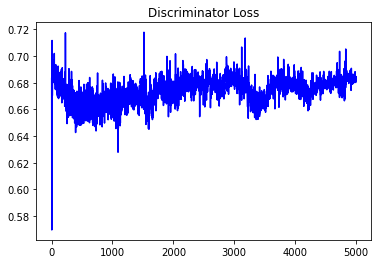

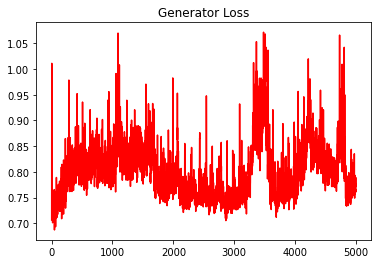

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

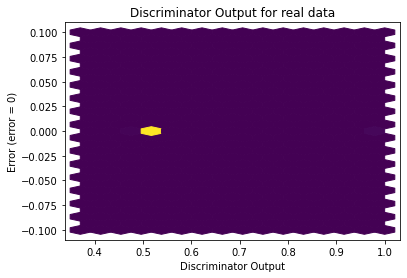

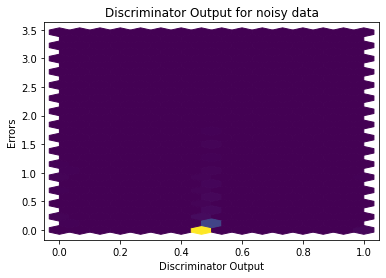

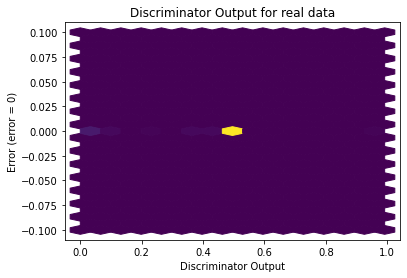

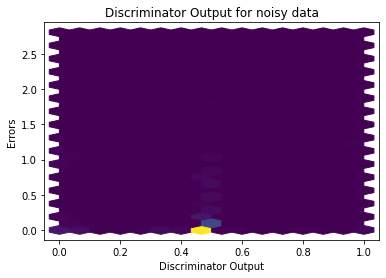

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


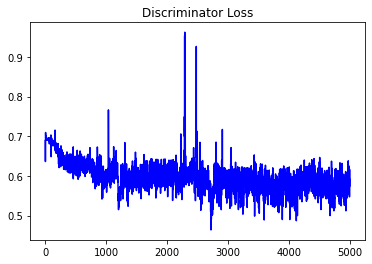

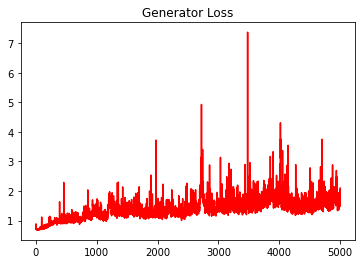

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

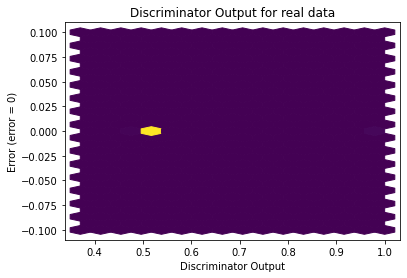

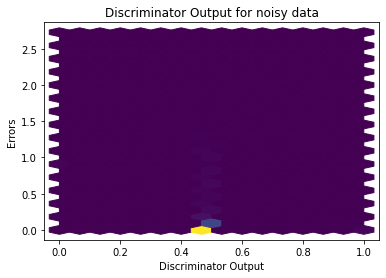

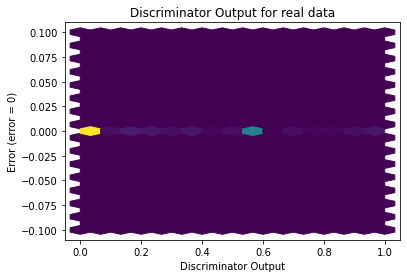

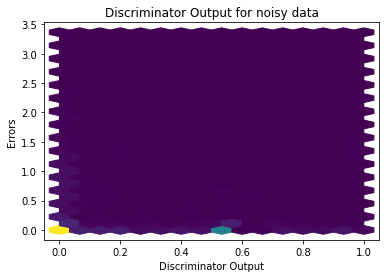

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[1.]], device='cuda:0', requires_grad=True)
